# Data Discovery
Initial, descriptive review of raw data
- number of rows, columns,
- types of fields
- missing values (by column and by rows)

In [17]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import seaborn as sns

cmap = ListedColormap(['#C1B4AE', '#00864F', '#92140C', '#353238', '#BE5A38'])

### Mortgage.csv

In [32]:
df_mortgage = pd.read_csv('../data/0_raw/Mortgage.csv')
print(len(df_mortgage))
df_mortgage.head()

32561


,full_name,dob,town,paye,salary_band,years_with_employer,months_with_employer,hours_per_week,capital_gain,capital_loss,new_mortgage,sex,religion,relationship,race,native_country,workclass,demographic_characteristic
0,Mr. Dale Coles,1979-05-10,Edinburgh,53791313,£18109 yearly,20,6,40,2174,0,Yes,Male,Christianity,Not-in-family,White,United Kingdom,State-gov,77516
1,Joel Allen,1968-07-06,Leeds,24005258,£16945 yearly,28,1,13,0,0,Yes,Male,Christianity,Husband,White,United Kingdom,Self-emp-not-inc,83311
2,Mr. Craig Marc Davis,1979-02-10,Edinburgh,44124649,£729.87 pw,14,5,40,0,0,Yes,Male,Christianity,Not-in-family,White,United Kingdom,Private,215646
3,Mr. Brandon Thornton,1965-10-20,Edinburgh,85701281,£19087 yearly,32,6,40,0,0,Yes,Male,Christianity,Husband,Black,United Kingdom,Private,234721
4,Miss Brett Carol Fletcher,1990-02-20,Swindon,BR442000,£2741.5 per month,3,6,40,0,0,Yes,Female,Christianity,Wife,Black,Sweden,Private,338409


__Data types of the columns__

In [33]:
# data types of the fields
df_mortgage.dtypes

full_name                     object
dob                           object
town                          object
paye                          object
salary_band                   object
years_with_employer            int64
months_with_employer           int64
hours_per_week                 int64
capital_gain                   int64
capital_loss                   int64
new_mortgage                  object
sex                           object
religion                      object
relationship                  object
race                          object
native_country                object
workclass                     object
demographic_characteristic     int64
dtype: object

In [35]:
df_mortgage['dob'].iloc[0]

'1979-05-10'

`dob` column is read up as string. Let's convert it to `datetime`

In [36]:
df_mortgage['dob'] = pd.to_datetime(df_mortgage['dob'], yearfirst=True)

__describe numeric columns__

In [26]:
# Descriptive stats of numeric fields
df_mortgage.describe()

,years_with_employer,months_with_employer,hours_per_week,capital_gain,capital_loss,demographic_characteristic
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,3.256100e+04
mean,5.170326,5.519425,40.437456,1077.648844,87.303830,1.897784e+05
std,6.437202,3.466831,12.347429,7385.292085,402.960219,1.055500e+05
min,0.000000,0.000000,1.000000,0.000000,0.000000,1.228500e+04
25%,1.000000,2.000000,40.000000,0.000000,0.000000,1.178270e+05
50%,3.000000,6.000000,40.000000,0.000000,0.000000,1.783560e+05
75%,7.000000,9.000000,45.000000,0.000000,0.000000,2.370510e+05
max,57.000000,11.000000,99.000000,99999.000000,4356.000000,1.484705e+06


In [ ]:
# TODO univariate plots for the above
f, ax = plt.subplots(figsize=(7, 6))
ax.set_xscale("log")

sns.boxplot(data=df_mortgage.select_dtypes(include='number').melt(var_name='column'),
            x="value",
            y="column", 
#             whis=0.1,
            width=.6,
            palette=cmap.colors);

sns.stripplot(data=df_mortgage.select_dtypes(include='number').melt(var_name='column'),
              x="value",
              y="column",
              size=2, color=".3", linewidth=0)


ax.xaxis.grid(True)
ax.set(ylabel="")
ax.set_xlim(left=0.1)
sns.despine(trim=True, left=True)
ax.yaxis.set_tick_params(left = False)

__describe categorical columns__

In [38]:
# get number of unique values the categorical columns
mortgage_cat_cols_cardinality = []

for cat_col in df_mortgage.select_dtypes(include='object').columns:
    mortgage_cat_cols_cardinality.append([cat_col, len(df_mortgage[cat_col].unique())])
    
df_mortgage_cat_cols_cardinality = pd.DataFrame(mortgage_cat_cols_cardinality,
                                               columns=['Column', 'No of unique values'])

In [39]:
df_mortgage_cat_cols_cardinality

,Column,No of unique values
0,full_name,31169
1,town,2649
2,paye,26475
3,salary_band,18326
4,new_mortgage,1
5,sex,2
6,religion,8
7,relationship,6
8,race,5
9,native_country,40


<AxesSubplot: xlabel='No of unique values', ylabel='Column'>

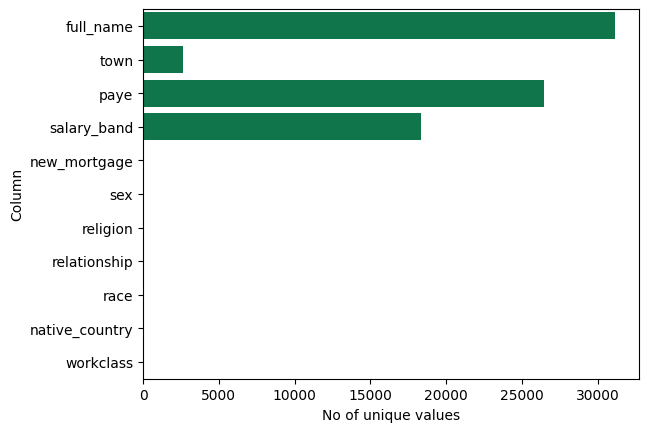

In [64]:
sns.barplot(df_mortgage_cat_cols_cardinality,
            y='Column',
            x='No of unique values', 
            color=cmap.colors[1])

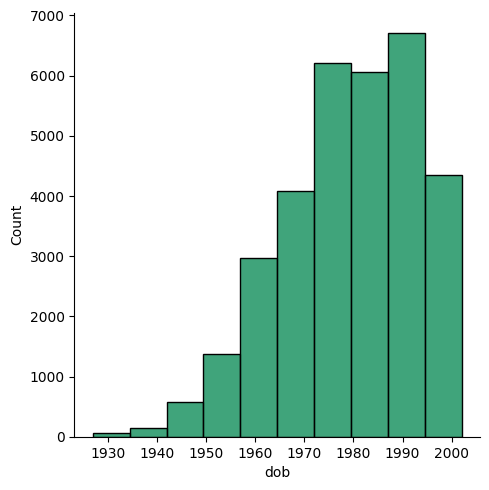

In [58]:
sns.displot(df_mortgage['dob'].dt.year, bins=10, color=cmap.colors[1]);

### Campaign.csv

In [59]:
df_campaign = pd.read_csv('../data/0_raw/Campaign.csv')
print(len(df_campaign))
df_campaign.head()

32060


,participant_id,name_title,first_name,last_name,age,postcode,marital_status,education,job_title,occupation_level,education_num,familiarity_FB,view_FB,interested_insurance,company_email,created_account
0,8.997000e+12,Mr.,Dale,Coles,39,EH4 9FL,Never-married,Bachelors,Furniture conservator/restorer,1,17,7,9,0,jrhodes@jones.com,No
1,2.764970e+12,NaN,Joel,Allen,50,LS5H 0JG,Married-civ-spouse,Bachelors,"Administrator, sports",4,17,9,6,1,william32@carey.com,No
2,8.454880e+12,Mr.,Craig,Davis,38,EH8W 2QJ,Divorced,HS-grad,Armed forces training and education officer,12,12,5,4,1,smithvanessa@coles.org,No
3,5.781320e+12,Mr.,Brandon,Thornton,53,EH2 5UE,Married-civ-spouse,11th,Facilities assistant,1,9,9,2,0,sbarrett@hart.biz,No
4,8.687490e+12,Miss,Brett,Fletcher,28,SN19 0PU,Married-civ-spouse,Bachelors,Information systems manager,12,17,8,9,1,lparkinson@butler.com,No
